In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle

# Experiment Visualizations

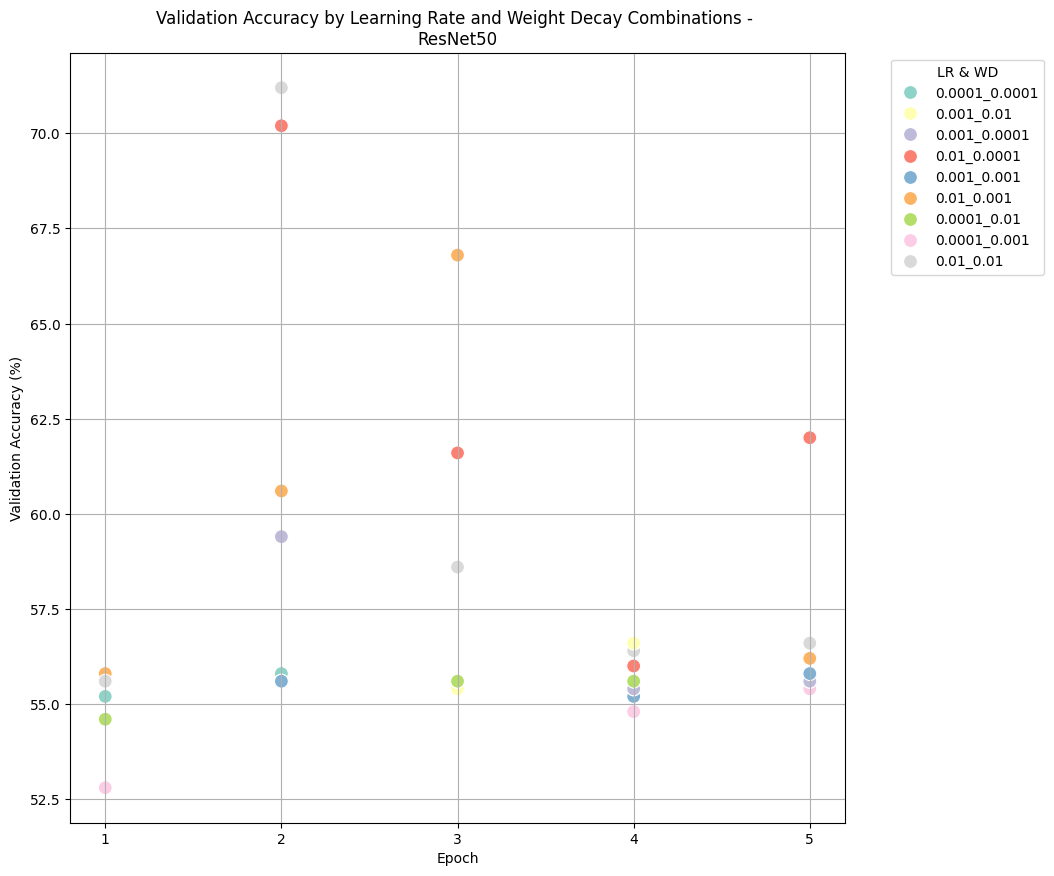

In [2]:
res50_training = pd.read_csv('/Users/ianduke/Desktop/temp_folder/resnet50_experiments.csv')

df = pd.DataFrame(res50_training)

# Creating a new column for the hue
df['LR_WD'] = df['Learning Rate'].astype(str) + '_' + df['Weight Decay'].astype(str)

# Sorting by epoch for proper line plotting
df.sort_values(by='Epoch', inplace=True)

# Plotting lines
plt.figure(figsize=(10, 10))
# sns.lineplot(data=df, x='Epoch', y='Validation Accuracy', hue='LR_WD', palette='Set3', marker='o')

sns.scatterplot(data=df, x='Epoch', y='Validation Accuracy', hue='LR_WD', palette='Set3', s=100)  

plt.title('Validation Accuracy by Learning Rate and Weight Decay Combinations - \nResNet50')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.legend(title='LR & WD', bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting the x-axis ticks to integer values
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()



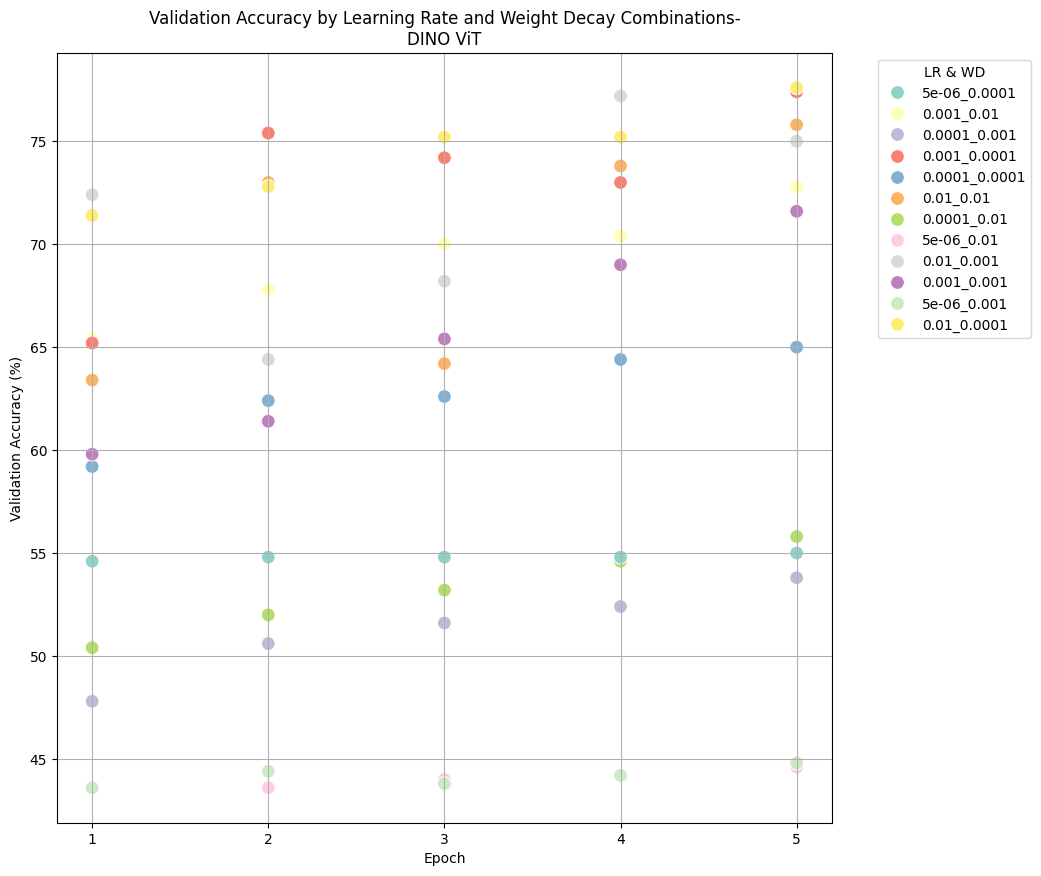

In [3]:
dino_training = pd.read_csv('/Users/ianduke/Desktop/temp_folder/dinov2_experiments.csv')


df = pd.DataFrame(dino_training)

# Creating a new column for the hue
df['LR_WD'] = df['Learning Rate'].astype(str) + '_' + df['Weight Decay'].astype(str)

# Sorting by epoch for proper line plotting
df.sort_values(by='Epoch', inplace=True)

# Plotting lines
plt.figure(figsize=(10, 10))
#sns.lineplot(data=df, x='Epoch', y='Validation Accuracy', hue='LR_WD', palette='Set3', marker='o')

sns.scatterplot(data=df, x='Epoch', y='Validation Accuracy', hue='LR_WD', palette='Set3', s=100)  # 'legend=None' to avoid duplicate legends

plt.title('Validation Accuracy by Learning Rate and Weight Decay Combinations-\nDINO ViT')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.legend(title='LR & WD', bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting the x-axis ticks to integer values
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()


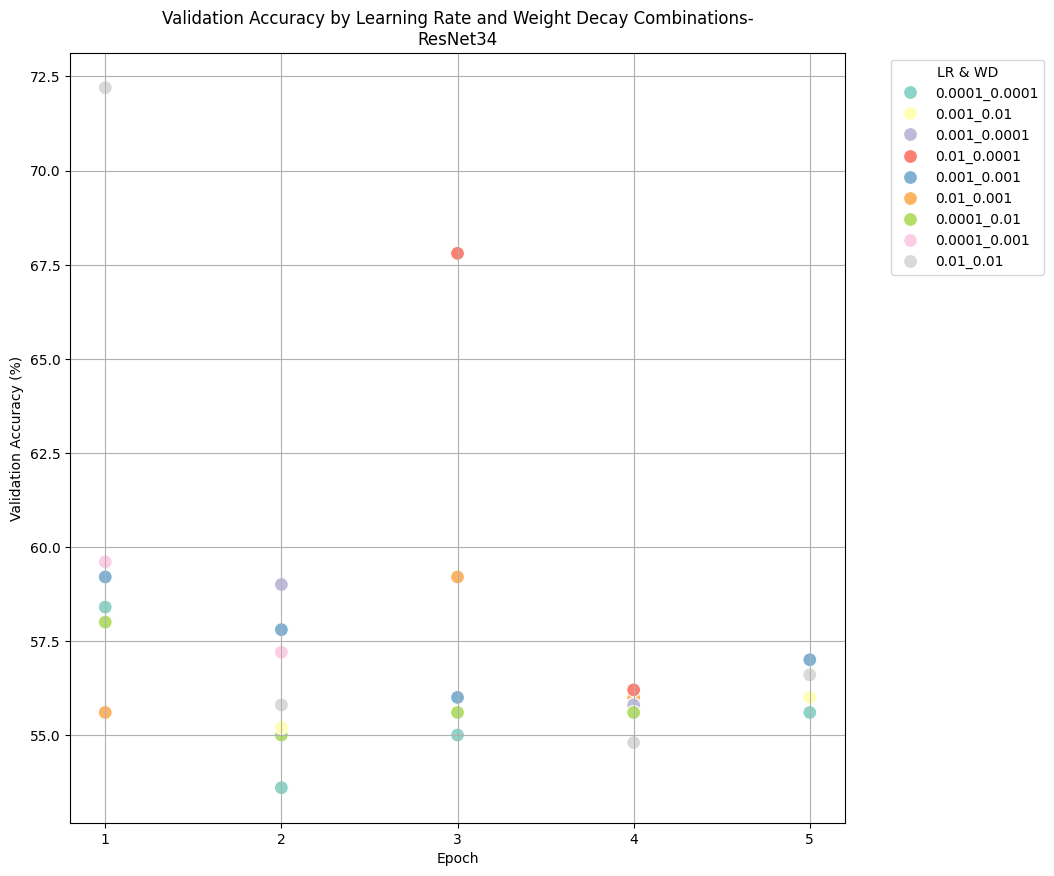

In [4]:
resnet34_training = pd.read_csv('/Users/ianduke/Desktop/temp_folder/resnet34_experiments.csv')


df = pd.DataFrame(resnet34_training)

# Creating a new column for the hue
df['LR_WD'] = df['Learning Rate'].astype(str) + '_' + df['Weight Decay'].astype(str)

# Sorting by epoch for proper line plotting
df.sort_values(by='Epoch', inplace=True)

# Plotting lines
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Epoch', y='Validation Accuracy', hue='LR_WD', palette='Set3', s=100)  # 'legend=None' to avoid duplicate legends

plt.title('Validation Accuracy by Learning Rate and Weight Decay Combinations-\nResNet34')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.legend(title='LR & WD', bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting the x-axis ticks to integer values
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()


# Model Training Loss Curves

In [5]:
file_path = '/Users/ianduke/Desktop/dog-emotion-classification/saved_output/dinov2_training.pkl'

with open(file_path, 'rb') as file:
    dino_v2_training_info = pickle.load(file)

In [6]:
dino_v2_training_info

{'Training Loss': [0.842704380117986,
  0.32423353517654385,
  0.27131774926456614,
  0.2688955812762015,
  0.3333502199555558],
 'Validation Loss': [0.5658521130919772,
  0.4674025284929274,
  0.8992280398951912,
  0.6616836459191417,
  0.5570843272649014],
 'Validation Accuracy': [84.00668709947061,
  82.05628308721093,
  80.27305656171636,
  81.22039565338534,
  82.72499303427138]}

In [7]:
def clean_dict(dict):
    return_dic = {}
    return_dic['Training Loss']  = dict['Training Loss']
    return_dic['Validation Loss']  = dict['Validation Loss']
    return return_dic


In [8]:
dino_v2_training_info = clean_dict(dino_v2_training_info)

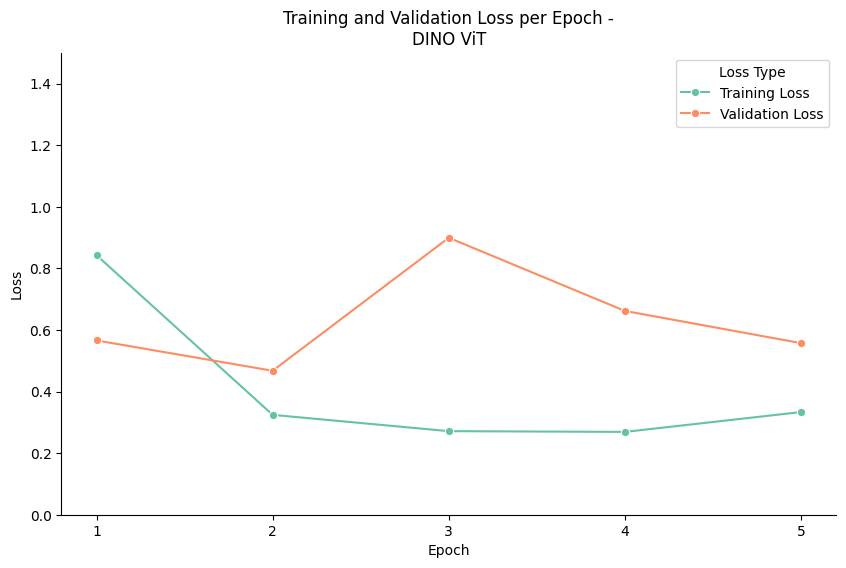

In [9]:
df = pd.DataFrame(dino_v2_training_info)

df.reset_index(inplace=True)
df.rename(columns={'index': 'Epoch'}, inplace=True)
df['Epoch'] += 1  

df_melted = df.melt(id_vars=["Epoch"], var_name="Type", value_name="Loss")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_melted, x='Epoch', y='Loss', hue='Type', palette='Set2', marker='o')

plt.title('Training and Validation Loss per Epoch -\nDINO ViT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Loss Type')

# Remove top and right spines
sns.despine()

# Setting the x-axis ticks to integer values
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Setting the y-axis limits
plt.ylim(0, 1.5)

plt.show()


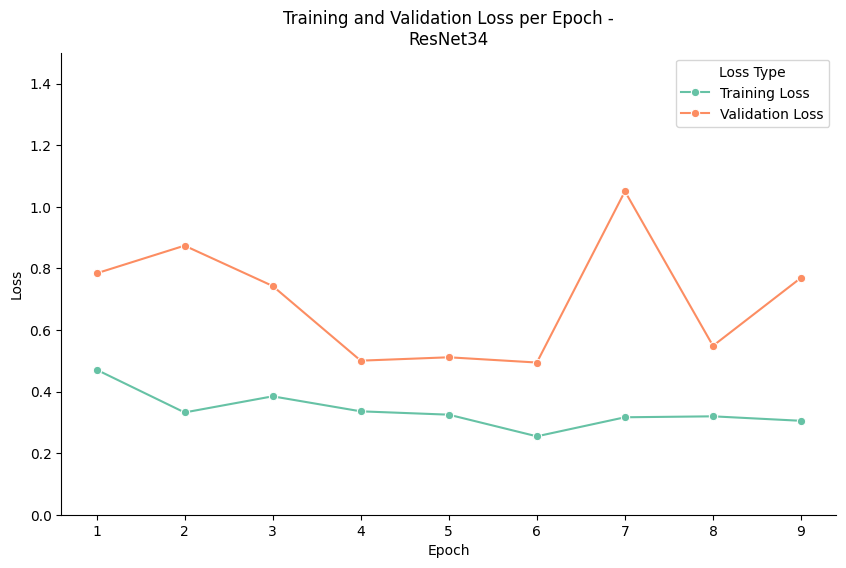

In [10]:
file_path = '/Users/ianduke/Desktop/dog-emotion-classification/saved_output/res34_training.pkl'

with open(file_path, 'rb') as file:
    res34_training_info = pickle.load(file)

res34_training_info = clean_dict(res34_training_info)

df = pd.DataFrame(res34_training_info)

df.reset_index(inplace=True)
df.rename(columns={'index': 'Epoch'}, inplace=True)
df['Epoch'] += 1

df_melted = df.melt(id_vars=["Epoch"], var_name="Type", value_name="Loss")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_melted, x='Epoch', y='Loss', hue='Type', palette='Set2', marker='o')

plt.title('Training and Validation Loss per Epoch -\nResNet34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Loss Type')

# Remove top and right spines
sns.despine()

# Setting the x-axis ticks to integer values
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Setting the y-axis limits
plt.ylim(0, 1.5)

plt.show()


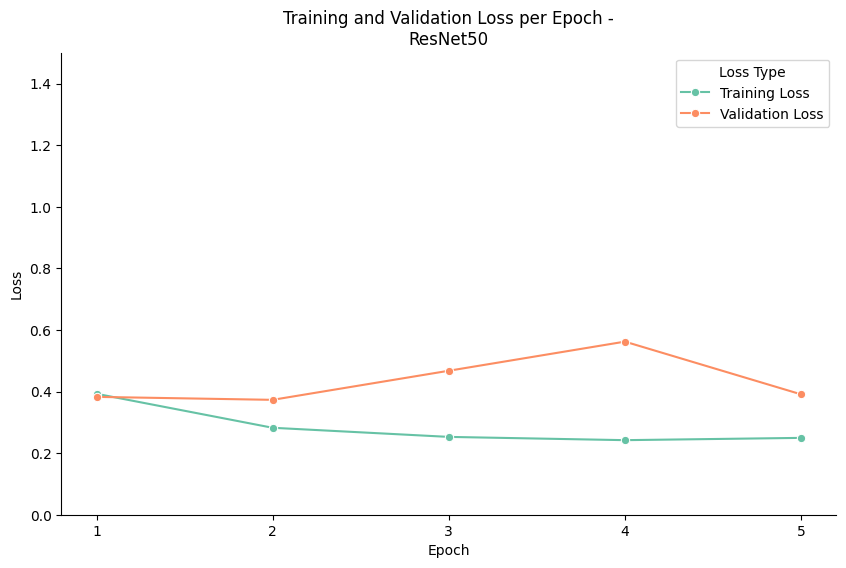

In [11]:
file_path = '/Users/ianduke/Desktop/dog-emotion-classification/saved_output/res50_training.pkl'

with open(file_path, 'rb') as file:
    res50_training_info = pickle.load(file)

res50_training_info = clean_dict(res50_training_info)

df = pd.DataFrame(res50_training_info)

df.reset_index(inplace=True)
df.rename(columns={'index': 'Epoch'}, inplace=True)
df['Epoch'] += 1 

df_melted = df.melt(id_vars=["Epoch"], var_name="Type", value_name="Loss")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_melted, x='Epoch', y='Loss', hue='Type', palette='Set2', marker='o')

plt.title('Training and Validation Loss per Epoch -\nResNet50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Loss Type')

# Remove top and right spines
sns.despine()

# Setting the x-axis ticks to integer values
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Setting the y-axis limits
plt.ylim(0, 1.5)

plt.show()
